<h1> problématique des loyers</h1>


La question qu'on essaie de résoudre est :
Étant donné les caractéristiques de mon appartement, combien devrais-je normalement payer mon loyer ?

 la seule caractéristique dont nous disposons est la surface de l'appartement. Notre  set est un ensemble d'observations de surface et leur loyer associé :  (x,y)=(surface,loyer) .

In [152]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy.matlib
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
houses = pd.read_csv('house.csv')

<h2> 1ère méthode</h2>

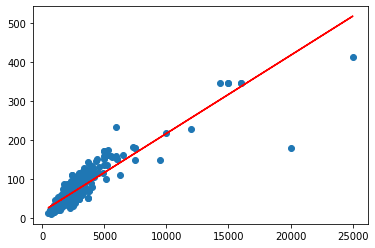

In [153]:
# Found on https://towardsdatascience.com/linear-regression-in-6-lines-of-python-5e1d0cd05b8d
X = houses.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = houses.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X, Y)  # perform linear regression
Y_pred = linear_regressor.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

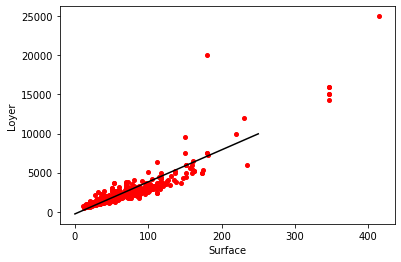

In [154]:
# Soit theta = (Xt . X)^(-1) . Xt . Y
X = np.matrix([np.ones(houses.shape[0]), houses['surface'].values]).T
Y = np.matrix(houses['loyer']).T
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)

plt.xlabel('Surface')
plt.ylabel('Loyer')
plt.plot(houses['surface'], houses['loyer'], 'ro', markersize=4)

plt.plot([0,250], [theta.item(0),theta.item(0) + 250 * theta.item(1)], linestyle='-', c='#000000')
plt.show()

<h2> 2ère méthode</h2>

41.04083044865394
-287.78381758240266


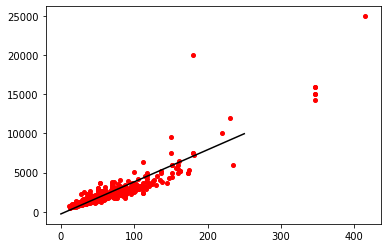

In [162]:
nominateur = 0
denominateur = 1 # prevent division per zero error

for i in range(len(houses) - 1):
    surface = houses["surface"][i]
    loyer = houses["loyer"][i]
   
    nominateur += (surface * loyer) - (surface * houses["loyer"].mean()) + (houses["surface"].mean() * loyer) - (houses["surface"].mean() * houses["loyer"].mean())
    denominateur += surface * surface - ( 2 * surface * houses["surface"].mean()) + (houses["surface"].mean() * houses["surface"].mean())
   
B1 = nominateur / denominateur

B0 = houses["loyer"].mean() - (B1 * houses["surface"].mean())

print(B1)
print(B0)

plt.plot(houses["surface"], houses["loyer"], "ro", markersize=4)
plt.plot([0,250], [B0, B0 + 250 * B1], linestyle="-", c="#000000")
plt.show()


<h2>3ème méthode</h2>

In [201]:
def cal_cost(theta, X, y):
    n = len(y)
    predictions = X.dot(theta)
    cost = (1/2 * n) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, theta, learning_rate=0.01, iterations=100):
    n = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    for it in range(iterations):
        prediction = X.dot(theta)
        theta -= (1/n) * learning_rate * (X.T.dot((prediction - y)))
        theta_history[it,:] = theta.T
        cost_history[it] = cal_cost(theta, X, y)
        
    return theta, cost_history, theta_history

n_iter = 50
X = houses
X_b = np.c_[np.ones((len(X),1))]
y = houses.loyer
theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
theta,cost_history,theta_history = gradient_descent(X_b, y, theta, 0.1, n_iter)

fig,ax = plt.subplots()

ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
print(cost_history)
ax.plot(range(n_iter),cost_history,'b.')

ValueError: shapes (545,1) and (2,) not aligned: 1 (dim 1) != 2 (dim 0)

<h2>Essai d'analyse discriminante</h2>

/home/jaslieb/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


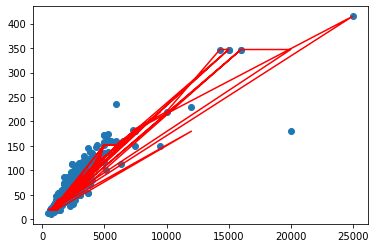

In [156]:
# Inspired from link
X = houses.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
Y = houses.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
linear_discriminant = LinearDiscriminantAnalysis()  # create object for the class
linear_discriminant.fit(X, Y)  # perform linear regression
Y_pred = linear_discriminant.predict(X)  # make predictions
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [157]:
housesCount = len(houses.groupby('surface')) + 1
houses_means = np.empty([housesCount, 2])
for c, rows in houses.groupby('surface') :
    np.append(houses_means, rows.mean())
    
houses_means

array([[6.93928516e-310, 6.93928516e-310],
       [3.03274964e-316, 3.03274964e-316],
       [6.93921599e-310, 0.00000000e+000],
       [1.16095484e-028, 3.74168445e+233],
       [3.10275055e-115, 2.58005617e+185],
       [1.81450396e-152, 5.43472210e-323],
       [2.31633957e-152, 6.42285340e-323],
       [6.91691904e-323, 7.41098469e-323],
       [7.90505033e-323, 8.39911598e-323],
       [8.89318163e-323, 9.38724727e-323],
       [9.88131292e-323, 1.03753786e-322],
       [1.08694442e-322, 1.13635099e-322],
       [1.18575755e-322, 1.23516411e-322],
       [1.28457068e-322, 1.33397724e-322],
       [1.38338381e-322, 1.43279037e-322],
       [1.48219694e-322, 1.53160350e-322],
       [1.58101007e-322, 1.63041663e-322],
       [1.67982320e-322, 1.72922976e-322],
       [1.77863633e-322, 1.82804289e-322],
       [1.87744945e-322, 1.92685602e-322],
       [1.97626258e-322, 2.02566915e-322],
       [2.07507571e-322, 2.12448228e-322],
       [2.17388884e-322, 2.22329541e-322],
       [2.2

In [158]:
within_class_scatter_matrix = np.zeros((housesCount,housesCount))
for c, rows in houses.groupby('surface'):
    s = np.zeros((housesCount,housesCount))
    for index, row in rows.iterrows():
        if c < housesCount - 1:
            x = row.values
            mc = houses_means[c]
            s += (x - mc).dot((x - mc).T)
            
    within_class_scatter_matrix += s
within_class_scatter_matrix

array([[inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       ...,
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf]])

In [159]:
len(houses.where(houses['loyer']==450).index)
for c, rows in houses_means:
    print(len(houses.where(houses['loyer']==c).index))
    
t = houses.mean()
t

545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545
545


loyer      2307.502752
surface      63.236697
dtype: float64

In [160]:
between_class_scatter_matrix = np.empty((housesCount,housesCount))
#for c, rows in houses_means:
for c in range(housesCount):
    n = len(houses.where(houses['loyer']==c).index)
    
    mc = houses_means[c]
    m = houses_means
    
    between_class_scatter_matrix += n * (mc - m).dot((mc - m).T)
between_class_scatter_matrix

/home/jaslieb/.local/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in add
  if __name__ == '__main__':


array([[inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       ...,
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf]])

In [161]:
#eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(within_class_scatter_matrix).dot(between_class_scatter_matrix))

mean_vec = []
for i in houses["loyer"].unique():
    mean_vec.append( (houses[houses["loyer"]==i].mean()[:1]) )
mean_vec


for j in range(houses["loyer"]):
    row = houses.loc[j]
    mv = mean_vec[j]

TypeError: 'Series' object cannot be interpreted as an integer

In [ ]:
SW = np.zeros((1,1))
for i in mean_vec: #2 is number of classes
    per_class_sc_mat = np.zeros((1,1))
    print(i)
    #houses[houses["loyer"]==i]
    for j in range(houses[houses["loyer"]==i]):
        row, mv = houses.loc[j][:1].reshape(1,1), i.reshape(1,1)
        per_class_sc_mat += (row-mv).dot((row-mv).T)
        print(per_class_sc_mat)
    SW += per_class_sc_mat
print('within-class Scatter Matrix:\n', SW)
overall_mean = np.array(houses.drop("loyer", axis=1).mean())
SB = np.zeros((1,1))
for i in range(1): #2 is number of classes
    n = houses[houses["loyer"]==i].shape[0]
    mv = mean_vec[i].reshape(1,1)
    overall_mean = overall_mean.reshape(1,1) # make column vector
    SB += n * (mv - overall_mean).dot((mv - overall_mean).T)
print('between-class Scatter Matrix:\n', SB)